In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline


In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


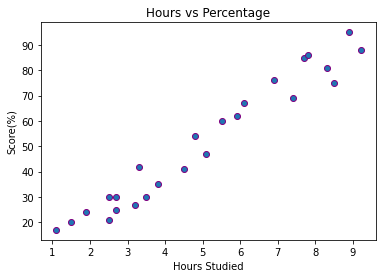

In [3]:
# Plotting the distribution of scores
plt.scatter(data.Hours, data.Scores, edgecolors='#800080')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score(%)')  
plt.show()

In [4]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression  
lin_reg_model = LinearRegression()  
lin_reg_model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


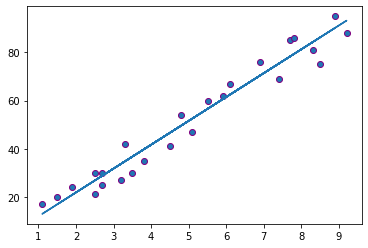

In [7]:
# Plotting the regression line
line = lin_reg_model.coef_*X+lin_reg_model.intercept_

# Plotting for the test data
plt.scatter(X, y, edgecolors='#800080')
plt.plot(X, line);
plt.show()

In [8]:
y_pred = lin_reg_model.predict(X_test) # Predicting the scores
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [9]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [10]:
# Comparing Actual vs Predicted
out_data = pd.DataFrame({'Hours': X_test.flatten(), 'Actual Marks': y_test, 'Predicted Marks': y_pred})  
out_data

,Hours,Actual Marks,Predicted Marks
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [11]:
#test with own data
hours = [9.25]
own_pred = lin_reg_model.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737538


In [12]:
#Accuracy of Linear Regression model
print('Train set Accuracy', lin_reg_model.score(X_train, y_train))
print('Test set Accuracy', lin_reg_model.score(X_test, y_test))

Train set Accuracy 0.9515510725211552
Test set Accuracy 0.9454906892105356


In [13]:
#Mean Absolute Error of Linear Regression Model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
